In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [2]:
project_path = os.path.abspath('..')
data_path = project_path + '/data/'

In [3]:
df = pd.read_excel(data_path + 'table_prepared.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2000 non-null   int64  
 1   name                 2000 non-null   object 
 2   area.name            2000 non-null   object 
 3   salary.from          1760 non-null   float64
 4   salary.to            1230 non-null   float64
 5   salary.gross         1999 non-null   float64
 6   salary.currency      2000 non-null   object 
 7   snippet.requirement  1985 non-null   object 
 8   experience.name      2000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 140.8+ KB


In [5]:
# Видно, что есть 4 столбца числовых и 5 столбцов текстовых.

In [6]:
# Анализ числовых столбцов
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1.245514e+08,3.157907e+06,42636573.0,124583354.5,124975919.0,125154797.5,125292360.0
salary.from,1760.0,3.555218e+05,1.913135e+06,5.0,60000.0,100000.0,180000.0,35000000.0
salary.to,1230.0,6.251000e+05,3.185398e+06,220.0,90000.0,150000.0,250000.0,45000000.0
salary.gross,1999.0,2.896448e-01,4.537110e-01,0.0,0.0,0.0,1.0,1.0


In [7]:
# salary.gross - бинарный признак.
# Значения по ЗП сильно рознятся.

In [8]:
df.head(10)

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,1.0,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет
1,125269826,React Developer,Ташкент,5000000.0,8000000.0,1.0,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет
2,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,0.0,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,1.0,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет
4,125255595,Веб-разработчик/Web-программист/Front End deve...,Астана,100000.0,400000.0,0.0,KZT,"Обязательное знание: HTML, CSS, JS. Желательно...",От 1 года до 3 лет
5,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,0.0,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет
6,125289988,Front-end Developer,Ярославль,40000.0,75000.0,0.0,RUR,"Отличное знание JavaScript, HTML, CSS. Опыт ра...",От 1 года до 3 лет
7,124298954,Middle Frontend Developer,Москва,180000.0,220000.0,0.0,RUR,Работал со следующими технологиями: JavaScript...,От 3 до 6 лет
8,125135271,"ReactJs, React Native developer",Астана,NaN,1500000.0,0.0,KZT,NaN,Нет опыта
9,124980166,Frontend-разработчик,Ташкент,400.0,700.0,0.0,USD,"Опыт работы с Next.js,(от 1-х лет). Strong с R...",От 1 года до 3 лет


In [ ]:
# на ЗП также влияет gross / не gross, т.е. до / после вычета налогов
# В каждой стране свое налогооблажение
# Для каждого города сделаем колонку country:

In [11]:
df['area.name'].unique()

array(['Шымкент', 'Ташкент', 'Астана', 'Ярославль', 'Москва', 'Ош',
       'Алматы', 'Усть-Каменогорск', 'Волгоград', 'Томск', 'Минск',
       'Воронеж', 'Новосибирск', 'Тверь', 'Лорино (Чукотский АО)',
       'Курск', 'Иваново (Ивановская область)', 'Тбилиси',
       'Санкт-Петербург', 'Самара', 'Донецк', 'Краснодар', 'Иннополис',
       'Ульяновск', 'Оренбург', 'Тюмень', 'Саратов', 'Бишкек', 'США',
       'Липецк', 'Екатеринбург', 'Луганск', 'Барнаул', 'Тольятти',
       'Красноярск', 'Уфа', 'Майкоп', 'Тула', 'Ростов-на-Дону',
       'Новополоцк', 'Махачкала', 'Пермь', 'Шахты', 'Рязань', 'Казань',
       'Владивосток', 'Улан-Удэ', 'Нижний Новгород',
       'Мытищи (Московская область)', 'Реутов (Московская область)',
       'Сербия', 'Павлодар', 'Нижневартовск', 'Калининград',
       'Новокузнецк', 'Чебоксары', 'Набережные Челны', 'Навои',
       'Ставрополь', 'Кипр', 'Новороссийск', 'Киров (Кировская область)',
       'Брест', 'Симферополь', 'Звенигород (Московская область)',
      

In [13]:
# Словари с городами / странами и нфдл:

# Словарь город -> страна
city_country = {
    'Шымкент': 'Казахстан',
    'Ташкент': 'Узбекистан',
    'Астана': 'Казахстан',
    'Ярославль': 'Россия',
    'Москва': 'Россия',
    'Ош': 'Кыргызстан',
    'Алматы': 'Казахстан',
    'Усть-Каменогорск': 'Казахстан',
    'Волгоград': 'Россия',
    'Томск': 'Россия',
    'Минск': 'Беларусь',
    'Воронеж': 'Россия',
    'Новосибирск': 'Россия',
    'Тверь': 'Россия',
    'Лорино (Чукотский АО)': 'Россия',
    'Курск': 'Россия',
    'Иваново (Ивановская область)': 'Россия',
    'Тбилиси': 'Грузия',
    'Санкт-Петербург': 'Россия',
    'Самара': 'Россия',
    'Донецк': 'Россия',
    'Краснодар': 'Россия',
    'Иннополис': 'Россия',
    'Ульяновск': 'Россия',
    'Оренбург': 'Россия',
    'Тюмень': 'Россия',
    'Саратов': 'Россия',
    'Бишкек': 'Кыргызстан',
    'США': 'США',
    'Липецк': 'Россия',
    'Екатеринбург': 'Россия',
    'Луганск': 'Россия',
    'Барнаул': 'Россия',
    'Тольятти': 'Россия',
    'Красноярск': 'Россия',
    'Уфа': 'Россия',
    'Майкоп': 'Россия',
    'Тула': 'Россия',
    'Ростов-на-Дону': 'Россия',
    'Новополоцк': 'Беларусь',
    'Махачкала': 'Россия',
    'Пермь': 'Россия',
    'Шахты': 'Россия',
    'Рязань': 'Россия',
    'Казань': 'Россия',
    'Владивосток': 'Россия',
    'Улан-Удэ': 'Россия',
    'Нижний Новгород': 'Россия',
    'Мытищи (Московская область)': 'Россия',
    'Реутов (Московская область)': 'Россия',
    'Сербия': 'Сербия',
    'Павлодар': 'Казахстан',
    'Нижневартовск': 'Россия',
    'Калининград': 'Россия',
    'Новокузнецк': 'Россия',
    'Чебоксары': 'Россия',
    'Набережные Челны': 'Россия',
    'Навои': 'Узбекистан',
    'Ставрополь': 'Россия',
    'Кипр': 'Кипр',
    'Новороссийск': 'Россия',
    'Киров (Кировская область)': 'Россия',
    'Брест': 'Беларусь',
    'Симферополь': 'Россия',
    'Звенигород (Московская область)': 'Россия',
    'Дубки (Дагестан)': 'Россия',
    'Таиланд': 'Таиланд',
    'Орел': 'Россия',
    'Калуга': 'Россия',
    'Германия': 'Германия',
    'Пятигорск': 'Россия',
    'Таганрог': 'Россия',
    'Ижевск': 'Россия',
    'Кемерово': 'Россия',
    'Омск': 'Россия',
    'Волжский (Волгоградская область)': 'Россия',
    'Челябинск': 'Россия',
    'Иркутск': 'Россия',
    'Мурманск': 'Россия',
    'Анапа': 'Россия',
    'Смоленск': 'Россия',
    'Дмитров (Московская область)': 'Россия',
    'Гомель': 'Беларусь',
    'Раменское (Московская область)': 'Россия',
    'Люберцы  (Московская область)': 'Россия',
    'Магадан': 'Россия',
    'Брянск': 'Россия',
    'Бийск': 'Россия',
    'Аксай (Ростовская область)': 'Россия',
    'Могилев': 'Беларусь',
    'Армения': 'Армения',
    'Тамбов': 'Россия',
    'Аргентина': 'Аргентина',
    'Великий Новгород': 'Россия',
    'Петропавловск-Камчатский': 'Россия',
    'Благовещенск (Амурская область)': 'Россия',
    'Витебск': 'Беларусь',
    'Туапсе': 'Россия',
    'Череповец': 'Россия',
    'Владимир': 'Россия',
    'Долгопрудный (Московская область)': 'Россия',
    'Архангельск': 'Россия',
    'Черногория': 'Черногория',
    'Актобе': 'Казахстан',
    'Дзержинск (Нижегородская область)': 'Россия',
    'Южно-Сахалинск': 'Россия',
    'Самарканд': 'Узбекистан',
    'Белгород': 'Россия',
    'Узловая': 'Россия',
    'Батуми': 'Грузия',
    'Красногорск (Московская область)': 'Россия',
    'Термез': 'Узбекистан',
    'Орехово-Зуево (Московская область)': 'Россия',
    'Кызыл': 'Россия',
    'Серпухов (Московская область)': 'Россия',
    'Альметьевск': 'Россия',
    'Пенза': 'Россия',
    'Междуреченский (Ханты-Мансийский АО)': 'Россия',
    'Зеленоград': 'Россия',
    'Хабаровск': 'Россия',
    'Сургут': 'Россия',
    'Лебедянь': 'Россия',
    'Королев (Московская область)': 'Россия',
    'Железнодорожный  (Московская область)': 'Россия',
    'Березовский (Свердловская область)': 'Россия',
    'Пушкино (Московская область)': 'Россия',
    'Баку': 'Азербайджан',
    'Атырау': 'Казахстан',
    'Щербинка (Московская область)': 'Россия',
    'Адлер': 'Россия',
    'Астрахань': 'Россия',
    'Сочи': 'Россия',
    'Одинцово (Московская область)': 'Россия',
    'Пушкин': 'Россия',
    'Всеволожск': 'Россия',
    'Петропавловск': 'Казахстан',
    'Красноармейск (Московская область)': 'Россия',
    'Истра (Московская область)': 'Россия',
    'Саранск': 'Россия',
    'Ревда (Свердловская область)': 'Россия',
    'Подольск (Московская область)': 'Россия',
    'Перу': 'Перу',
    'Костанай': 'Казахстан',
    'Йошкар-Ола': 'Россия',
    'Уральск': 'Казахстан',
    'Солнечногорск (Московская область)': 'Россия',
    'Гродно': 'Беларусь',
    'Пинск': 'Беларусь',
    'Сызрань': 'Россия',
    'Балакирево': 'Россия',
    'Лида': 'Беларусь',
    'Жуковский  (Московская область)': 'Россия',
    'Коканд': 'Узбекистан',
    'Ангарск': 'Россия',
    'Находка': 'Россия',
    'Щелково (Московская область)': 'Россия',
    'Другое': 'Другое',
    'Караганда': 'Казахстан',
    'Дубна (Московская область)': 'Россия'
}

# Словарь страна -> налог НДФЛ
country_tax = {
    'Россия': 13,
    'Казахстан': 10,
    'Узбекистан': 12,
    'Кыргызстан': 10,
    'Беларусь': 13,
    'Грузия': 20,
    'Украина': 18,
    'США': 30,        # Упрощенный средний уровень
    'Сербия': 10,
    'Кипр': 20,
    'Германия': 35,
    'Армения': 20,
    'Аргентина': 30,
    'Черногория': 15,
    'Перу': 20,
    'Таиланд': 20,
    'Азербайджан': 14,
    'Другое': None
}


In [17]:
df['country'] = df['area.name'].apply(lambda x: city_country[x])

In [18]:
df['country'].value_counts()

country
Россия         1690
Казахстан       134
Беларусь         69
Узбекистан       58
Грузия           17
Кыргызстан        8
Сербия            8
Армения           3
США               2
Кипр              2
Таиланд           2
Черногория        2
Германия          1
Аргентина         1
Азербайджан       1
Перу              1
Другое            1
Name: count, dtype: int64

In [19]:
df['salary.gross'].value_counts()

salary.gross
0.0    1420
1.0     579
Name: count, dtype: int64

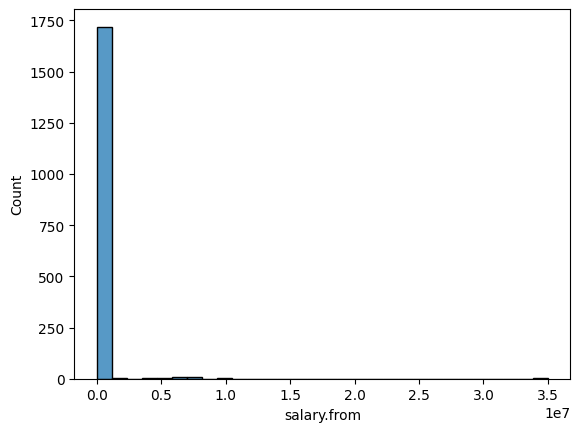

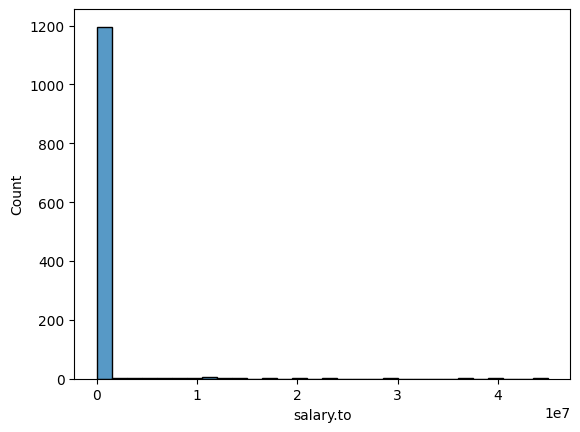

In [28]:

cols_to_convert = ['salary.from', 'salary.to']

for col in cols_to_convert:
    sns.histplot(df[col], bins=30)
    plt.show()

In [29]:
df[cols_to_convert].describe().T

,count,mean,std,min,25%,50%,75%,max
salary.from,1760.0,355521.791477,1.913135e+06,5.0,60000.0,100000.0,180000.0,35000000.0
salary.to,1230.0,625100.028455,3.185398e+06,220.0,90000.0,150000.0,250000.0,45000000.0


In [32]:
df.head(2)

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,salary.from_rub,salary.to_rub,country
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,1.0,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет,39145.25,62632.4,Казахстан
1,125269826,React Developer,Ташкент,5000000.0,8000000.0,1.0,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет,33460.00,53536.0,Узбекистан


In [ ]:
def get_gross_salary(x):
    city = x['area.name']

In [43]:
mask_not_gross = df['salary.gross']==0
df_not_gross = df[mask_not_gross]
df_gross = df[~mask_not_gross]

df_not_gross['NDFL'] = df_not_gross['country'].apply(lambda x: country_tax[x])
df_not_gross['NDFL'].value_counts()

C:\Users\Ed\AppData\Local\Temp\ipykernel_21828\2636755178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_gross['NDFL'] = df_not_gross['country'].apply(lambda x: country_tax[x])


NDFL
13    1264
10     101
12      39
20      12
30       3
14       1
Name: count, dtype: int64

In [44]:
df_not_gross[cols_to_convert].describe().T

,count,mean,std,min,25%,50%,75%,max
salary.from,1261.0,381003.068993,2.160499e+06,200.0,60000.0,100000.0,160000.0,35000000.0
salary.to,851.0,652856.274971,3.365617e+06,220.0,100000.0,150000.0,250000.0,45000000.0


In [45]:
# Приведение всех ЗП к gross
for col in cols_to_convert:
    
    df_not_gross[col] = df_not_gross[['NDFL',col]].apply(lambda x: x[col] / (1-x['NDFL']*0.01), axis=1)

df_not_gross['salary.gross'] = 1
df_2 = pd.concat([df_gross, df_not_gross])

C:\Users\Ed\AppData\Local\Temp\ipykernel_21828\2976968993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_gross[col] = df_not_gross[['NDFL',col]].apply(lambda x: x[col] / (1-x['NDFL']*0.01), axis=1)
C:\Users\Ed\AppData\Local\Temp\ipykernel_21828\2976968993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_gross[col] = df_not_gross[['NDFL',col]].apply(lambda x: x[col] / (1-x['NDFL']*0.01), axis=1)
C:\Users\Ed\AppData\Local\Temp\ipykernel_21828\2976968993.py:6: SettingWithCopyWarning: 
A v

In [46]:
# Убедимся в правильном подсчете gross
df_not_gross.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1420.0,1.246116e+08,2.827990e+06,4.263657e+07,1.245834e+08,1.249768e+08,1.251469e+08,1.252923e+08
salary.from,1261.0,4.336014e+05,2.454884e+06,2.298851e+02,6.896552e+04,1.149425e+05,1.839080e+05,3.977273e+07
salary.to,851.0,7.425879e+05,3.824219e+06,2.528736e+02,1.149425e+05,1.724138e+05,2.873563e+05,5.113636e+07
salary.gross,1420.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
salary.from_rub,1261.0,1.220214e+05,8.359059e+04,2.200000e+02,6.750400e+04,1.000000e+05,1.500000e+05,8.438000e+05
salary.to_rub,851.0,1.722141e+05,1.123589e+05,2.200000e+02,1.000000e+05,1.500000e+05,2.300000e+05,1.265700e+06
NDFL,1420.0,1.285493e+01,1.293480e+00,1.000000e+01,1.300000e+01,1.300000e+01,1.300000e+01,3.000000e+01


In [47]:
# В столбце currency видим разные форматы, в которых представлена ЗП. 
df_2['salary.currency'].value_counts()

salary.currency
RUR    1631
USD     134
KZT     122
BYR      44
UZS      40
EUR      20
KGS       6
GEL       3
Name: count, dtype: int64

In [48]:
# Приведем все ЗП к единому формату (рубли):
def to_rub(row):
    rates = {
        "USD": 84.38,         # за 1 USD
        "EUR": 99.33,         # за 1 EUR
        "KZT": 0.156581,      # за 1 KZT
        "BYR": 27.38,         # за 1 BYR
        "UZS": 0.006692,      # за 1 UZS
        "KGS": 0.964892,      # за 1 KGS
        "GEL": 31.3225,        # за 1 GEL
        "RUR": 1.0
    }
    currency = row["salary.currency"].upper()
    amount = row[row.index[0]]  # если column name (например, 'salary_from' или 'salary_to')
    if currency not in rates:
        raise ValueError(f"Неизвестная валюта: {currency}")
    return float(amount) * rates[currency]

# Пример использования:
cols_to_convert = ['salary.from', 'salary.to']
target_cols = [col + '_rub' for col in cols_to_convert]
for col, target_col in zip(cols_to_convert, target_cols):
    df_2[target_col] = df_2[[col, 'salary.currency']].apply(to_rub, axis=1)

In [49]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1.245514e+08,3.157907e+06,42636573.0,1.245834e+08,1.249759e+08,1.251548e+08,1.252924e+08
salary.from,1760.0,3.932073e+05,2.153098e+06,5.0,6.896552e+04,1.149425e+05,1.954023e+05,3.977273e+07
salary.to,1230.0,6.871826e+05,3.525959e+06,240.0,9.271552e+04,1.724138e+05,2.873563e+05,5.113636e+07
salary.gross,1999.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
salary.from_rub,1760.0,1.409557e+05,1.006266e+05,136.9,7.000000e+04,1.149425e+05,1.724138e+05,9.698851e+05
salary.to_rub,1230.0,2.002296e+05,1.432289e+05,240.0,1.034483e+05,1.724138e+05,2.528736e+05,1.454828e+06
NDFL,1420.0,1.285493e+01,1.293480e+00,10.0,1.300000e+01,1.300000e+01,1.300000e+01,3.000000e+01


In [51]:
df_2['clean_sal'] = df_2[target_cols].mean(axis=1)

In [52]:
df_2['clean_sal'].isna().sum()

np.int64(0)

<Axes: ylabel='clean_sal'>

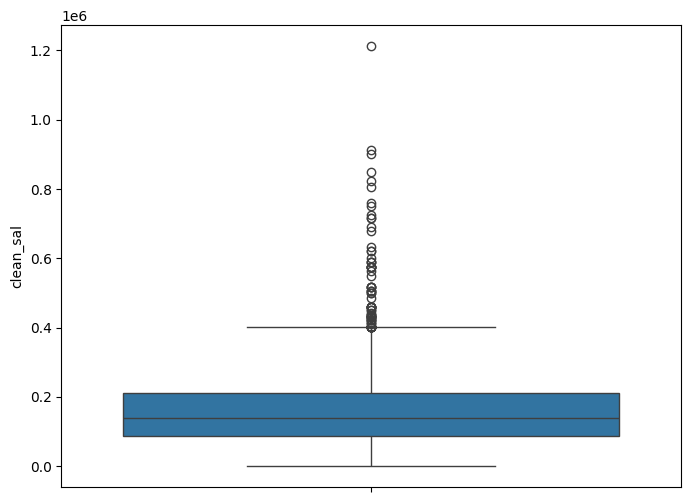

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(df_2['clean_sal'])

In [55]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.pca import PCA

X = df_2[['clean_sal']].values

models = [
    KNN(),
    IForest(),
    PCA()
]

for i, model in enumerate(models, 1):
    model.fit(X)
    df_2[f'anomaly{i}'] = model.predict(X)

# Голосование большинством
df_2['anomaly'] = df_2[['anomaly1', 'anomaly2', 'anomaly3']].sum(axis=1) >= 2
df_2['anomaly'] = df_2['anomaly'].astype(int)


In [56]:
df_2['anomaly'].value_counts()

anomaly
0    1849
1     151
Name: count, dtype: int64

In [57]:
anomaly_vacancies = df_2[df_2['anomaly']==1].index
anomaly_vacancies

Index([  20,   27,   37,   80,   90,  173,  196,  204,  233,  279,
       ...
       1758, 1760, 1801, 1803, 1846, 1882, 1906, 1923, 1966, 1985],
      dtype='int64', length=151)

In [ ]:
df_2.iloc[anomaly_vacancies]

In [61]:
df_2.columns

Index(['id', 'name', 'area.name', 'salary.from', 'salary.to', 'salary.gross',
       'salary.currency', 'snippet.requirement', 'experience.name',
       'salary.from_rub', 'salary.to_rub', 'country', 'NDFL', 'clean_sal',
       'anomaly1', 'anomaly2', 'anomaly3', 'anomaly'],
      dtype='object')

для каждой из аномалий, ориентируясь на название вакансии, требуемый опыт, регион, требования к вакансии, получить объяснение и в виде категории с кратким текстом, описывающим ее суть, добавить эти объяснения отдельным столбцов в датафрейм

In [62]:
cols_to_understand = ['name', 'area.name', 'snippet.requirement', 'experience.name']

In [63]:
import ollama
from tqdm import tqdm
# Объяснение аномальных значений ЗП
for idx in tqdm(anomaly_vacancies):
    row_text = df_2[cols_to_understand].loc[idx].to_dict()
    systemic_prompt = systemic_prompt = (
    "Ты — опытный HR-аналитик по рынку труда и зарплат в России. "
    "Перед тобой описание вакансии, в которой обнаружена аномальная (слишком высокая или низкая) зарплата. "
    "Используй данные о вакансии (название, регион, требования и требования к опыту) для краткого и объективного объяснения — по каким причинам именно эта вакансия могла попасть в выборку с аномальной ЗП, даже если часть информации ограничена. "
    "Если в данных явно видно объясняющий фактор (например, редкая профессия, высокая требуемая квалификация, много обязанностей, необычный регион), подчеркни его. "
    "Формулируй вывод коротко, максимально по делу, одну-две строки. Не используй вводные слова типа 'возможно', 'скорее всего', отвечай как эксперт."
    )

    prompt = f"Аномальные данные: {row_text}"

    # формируем список сообщений
    response = ollama.chat(
        model='gemma3:27b',
        messages=[
            {"role": "system", "content": systemic_prompt},
            {"role": "user", "content": prompt}
        ]
    )
    
    explanation = response['message']['content']
    df_2.at[idx, 'text'] = explanation


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [03:30<00:00,  1.40s/it]


In [65]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
df_2.loc[anomaly_vacancies, ['name', 'area.name','snippet.requirement' ,'experience.name','salary.from_rub','salary.to_rub','text']]

,name,area.name,snippet.requirement,experience.name,salary.from_rub,salary.to_rub,text
20,Financial director,Москва,Education: Knowledge of IFRS. Higher education (BA or MBA) in Finance / Economy. IT: Mastering SAP preferable (not mandatory).,Более 6 лет,500000.000000,1.200000e+06,"Высокий уровень зарплаты обусловлен **редкой комбинацией высокой квалификации (IFRS, MBA) и опыта для позиции финансового директора в Москве**, что указывает на поиск специалиста уровня C-suite или для реализации сложного проекта. Зарплата соответствует рынку для топ-менеджеров с таким профилем.\n"
27,Front-end Developer (UI/UX & SEO Optimization),Алматы,"Опыт работы на позиции Front-end <highlighttext>Developer</highlighttext> не менее 2–3 лет. Отличное знание HTML5, CSS3, JavaScript и...",От 1 года до 3 лет,15658.100000,3.131620e+04,"Указанный уровень опыта (1-3 года) не соответствует заявленным требованиям к квалификации и широкому спектру обязанностей (UI/UX & SEO), что указывает на завышенную зарплату для позиции начального уровня или неполную информацию об обязанностях. **Регион (Алматы) может вносить вклад в повышенную оплату труда, но не является единственной причиной аномалии.**\n"
37,Технический директор (CTO),Москва,"Опыт 3+ лет на ролях СТО, Head of <highlighttext>Development</highlighttext> или System Architect в продукте (eCommerce – плюс). Глубокие знания высоконагруженных...",Более 6 лет,600000.000000,8.500000e+05,Высокий уровень ответственности и требуемый опыт (более 6 лет на руководящих позициях) в сочетании с востребованностью специалистов в области eCommerce в Москве обуславливают аномально высокую заработную плату для данной позиции. **Редкая и высококвалифицированная роль в столичном регионе.**\n
80,Web-программист - стажер,Алматы,Carfast- Первый онлайн авто аукцион в Казахстане. Доброжелательный и целеустремленный командный игрок. Принимаете верные решения в критических ситуациях.,Нет опыта,15658.100000,1.565810e+04,"Зарплата в данной вакансии, вероятно, аномальна из-за географической привязки к Алматы (Казахстан), где уровень оплаты труда для начинающих специалистов может отличаться от российских стандартов, и специфики компании - онлайн-аукциона, где может быть более высокая потребность в IT-специалистах. Отсутствие требований к опыту также может обуславливать более высокую ставку для привлечения кандидатов.\n"
90,Директор по маркетингу (Digital),Москва,"Понимание процессов разработки веб-приложений и опыт взаимодействия с <highlighttext>разработчиками</highlighttext>. Знание основ digital-маркетинга, опыт запуска и оптимизации рекламных кампаний.",Более 6 лет,300000.000000,6.000000e+05,"Зарплата может быть аномально высокой из-за сочетания высокой востребованности digital-маркетологов с опытом управления разработкой в Москве, что указывает на редкую компетенцию и стратегическую роль. **Требование взаимодействия с разработчиками** для директора по маркетингу существенно расширяет зону ответственности и требует специфических знаний, что оправдывает более высокий уровень оплаты труда.\n"
173,Операционный директор (COO),Москва,"Имеет опыт операционного управления или руководства проектами в IT, системной интеграции, инжиниринге или других технологических бизнесах. Системный, структурный, умеет приоритизировать...",От 3 до 6 лет,350000.000000,4.000000e+05,"Зарплата аномально низкая для данной позиции, учитывая высокую ответственность и управленческий уровень (COO) в Москве; **требуемый опыт (3-6 лет) значительно ниже стандартного для руководителей такого уровня**, что может объяснять заниженную оплату. Позиция, вероятно, предполагает ограниченный функционал или этап развития компании, не требующий полномасштабного операционного управления.\n"
196,Java-разработчик,Алматы,Отличное знание Java и опыт коммерческой разработки. Опыт в разработке backend-систем и микросервисной архитектуре. Опыт работы с ETL-инструментами...,От 3 до 6 лет,397320.000000,NaN,"Зарплата аномально высока для Java-разработчика в Алматы, учитывая требуемый о

Результат анализа:
* Алгоритмы pyod корректно отображают аномалии ниже среднего и не всегда корректно обозначают верхнюю границу аномальных зп для некоторых  типов вакансий. Это связано с особенностями моделей и обучением моделей на ограниченной выборке
* В то же время LLM при описании "аномальных" объектов косвенно указала на проблему с выделением аномалий. Для вакансий с высокой ЗП модель зачастую писала "заниженная зарплата для этой должности", так как на рынке труда для такой должности (например, COO), ЗП выше среднего.

In [67]:
df_2.to_excel(data_path + '/results.xlsx', index=False)